In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
import pandas as pd
import numpy as np

# Mengatur seed untuk reproducibility
np.random.seed(100)

# Menghasilkan 1 juta data acak antara 100 dan 150
data_size = 20
x = np.random.randint(100, 151, size=data_size)
y = np.random.randint(100, 151, size=data_size)

# Membuat DataFrame
df1 = pd.DataFrame({'x': x, 'y': y})

# Menampilkan beberapa baris dari DataFrame

df1

,x,y
0,108,116
1,124,109
2,103,129
3,139,122
4,123,102
5,115,127
6,148,144
7,110,104
8,130,131
9,134,101


### disini saya mengestimasi betanya dengan cara metode regresi sederhana dimana formulanya yaitu dengan matriks 

#### dengan formula  $$
$$
\mathbf{A} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$



In [128]:
# Misalkan df adalah DataFrame yang sudah didefinisikan sebelumnya
# Misalkan 'x1' dan 'x2' adalah nama kolom di DataFrame df
# X = np.array(df[['x1', 'x2']])  # Ambil kolom 'x1' dan 'x2' dari DataFrame
X = np.column_stack((np.ones(df1.shape[0]), df1[['x']]))
Y = np.array(df1[['y']])  # Nilai-nilai untuk Y
# Menghitung (X^T * X)
X_transpose = X.T
XTX = X_transpose @ X

# Menghitung invers dari (X^T * X)
XTX_inv = np.linalg.inv(XTX)

# Menghitung (X^T * Y)
XTY = X_transpose @ Y

# Menghitung hasil akhir
result = XTX_inv @ XTY

# Menampilkan hasil
print("Hasil:")
print(result)

Hasil:
[[ 1.23841614e+02]
 [-3.38856202e-02]]


## kita buat plot dengan beta_0 dan beta_1 dengan cara matriks


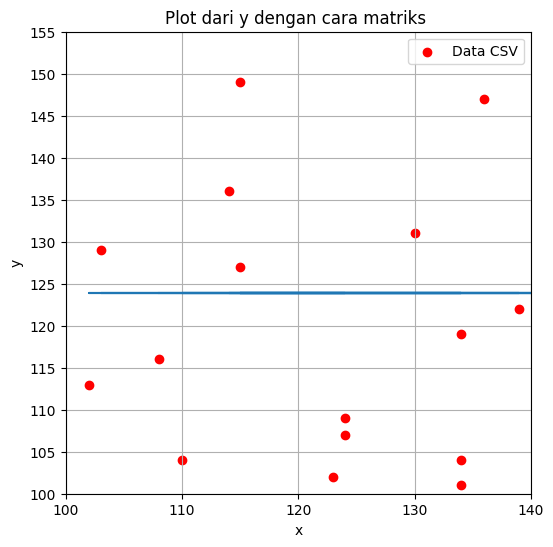

In [137]:
# Misalkan df1, beta_0, dan beta_1 sudah didefinisikan
# df1 = pd.read_csv('data.csv')  # Contoh cara membaca data
# beta_0 = 1000  # Contoh nilai beta_0
# beta_1 = 3000  # Contoh nilai beta_1

# Buat array x dari DataFrame
x1 = df1['x'] 

# Hitung nilai y
y1 = 1.23841614e+02 -3.38856202e-021 * x1


# Plot
plt.figure(figsize=(6, 6))
plt.plot(x1, y1)
plt.scatter(df1['x'], df1['y'], color='red', label='Data CSV')
plt.title('Plot dari y dengan cara matriks ')
plt.xlabel('x')
plt.ylabel('y')

# Menetapkan limit sumbu
plt.xlim(100, 130)  # Sesuaikan sesuai kebutuhan
plt.ylim(min(y), max(y))  # Sesuaikan dengan rentang nilai y yang dihitung

# # Garis horizontal dan vertikal di sumbu
# plt.axhline(0, color='black', lw=0.5, ls='--')
# plt.axvline(0, color='black', lw=0.5, ls='--')

# Mengatur ticks
plt.xticks(np.arange(100, 150, 10)) 
plt.yticks(np.arange(100, max(y) + 10, 5))  # Menyesuaikan rentang y

plt.grid()
plt.legend()
plt.show()

#### setelah itu saya akan mencari nilai R-kuadrat dari matriks tersebut

In [138]:
df1['xy'] = df1['x'] * df1['y']
df1['x^2'] = df1['x'] * df1['x']
df1['y^2'] = df1['y'] * df1['y']
# menegtahui jumlah nya 
a= df1['x'].sum()
b= df1['y'].sum()
c =df1['xy'].sum()
d = df1['x^2'].sum()
e = df1['y^2'].sum()
f = df1['y'].mean()
g = df1['x'].mean()


print("Jumlah kolom 'x':", a)
print("Jumlah kolom 'y':", b)
print("Jumlah kolom 'xy':", c)
print("Jumlah kolom 'x^2':", d)
print("Jumlah kolom 'y^2':", e)
print('rata-rata y ', f)
print('rata-rata x ', g)

Jumlah kolom 'x': 2533
Jumlah kolom 'y': 2391
Jumlah kolom 'xy': 302673
Jumlah kolom 'x^2': 325147
Jumlah kolom 'y^2': 290749
rata-rata y  119.55
rata-rata x  126.65


In [139]:
# menghitung R kuadrat
k =  ((y1-f)**2)
l = ((df1['y']- f)**2)
JKR = k.sum()
JKT = l.sum()
RKR = JKT/1
JKS = JKT - JKR
dk_galat = df1.shape[0] - 2
dk_total = df1.shape[0] - 1
RKS = JKS/dk_galat
f_statistik = RKR/RKS

R_kuadrat = JKR/JKT
print("jumlah r kuadrat yaitu ",R_kuadrat)
print("nilai Jkr yaitu ",JKR)
print("nilai JKT yaitu  ",JKT)
print("nilai JKS yaitu ",JKS)
print("jumlah nilai RKR ",RKR)
print("dgree of freedom pada galat ",dk_galat)
print("print degre of freedom total ",dk_total)
print("jumlah nilai RKS ", RKS)
print("F_statisiknya yaitu ",f_statistik)


jumlah r kuadrat yaitu  0.07509944331744905
nilai Jkr yaitu  368.3590144999218
nilai JKT yaitu   4904.950000000001
nilai JKS yaitu  4536.590985500079
jumlah nilai RKR  4904.950000000001
dgree of freedom pada galat  18
print degre of freedom total  19
jumlah nilai RKS  252.03283252778218
F_statisiknya yaitu  19.461551698663374


In [132]:
# menghitung R kuadrat
k =  ((y-f)**2)
l = ((df1['y']- f)**2)
JKR = k.sum()
JKT = l.sum()
RKR = JKT/1
JKS = JKT - JKR
dk_galat = df1.shape[0] - 2
dk_total = df1.shape[0] - 1
RKS = JKS/dk_galat
f_statistik = RKR/RKS

R_kuadrat = JKR/JKT
print("jumlah r kuadrat yaitu ",R_kuadrat)
print("nilai Jkr yaitu ",JKR)
print("nilai JKT yaitu  ",JKT)
print("nilai JKS yaitu ",JKS)
print("jumlah nilai RKR ",RKR)
print("dgree of freedom pada galat ",dk_galat)
print("print degre of freedom total ",dk_total)
print("jumlah nilai RKS ", RKS)
print("F_statisiknya yaitu ",f_statistik)


jumlah r kuadrat yaitu  1.0
nilai Jkr yaitu  4904.950000000001
nilai JKT yaitu   4904.950000000001
nilai JKS yaitu  0.0
jumlah nilai RKR  4904.950000000001
dgree of freedom pada galat  18
print degre of freedom total  19
jumlah nilai RKS  0.0
F_statisiknya yaitu  inf


C:\Users\BPSAdmin\AppData\Local\Temp\ipykernel_14348\4285832144.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  f_statistik = RKR/RKS


## dan saya lanjutkan dengan cara estimasi biasa dengan formula 

# Rumus Kemiringan (Slope) Regresi Linier

$$
b_1 = \frac{\sum (X_i Y_i) - \frac{(\sum X_i)(\sum Y_i)}{n}}{\sum X_i^2 - \frac{(\sum X_i)^2}{n}}
$$

#### dan b0 di dapatkan 


$$
b_0 = \bar{Y} - b_1 \bar{X}
$$


In [133]:
beta_1 = (c -((a*b)/30))/(d - (a**2/30))
beta_1

np.float64(0.9057807802185589)

In [134]:
beta_0 = f - beta_1*g
beta_0

np.float64(4.832864185319508)

## maka saya akan bentuk plot nya yaitu 


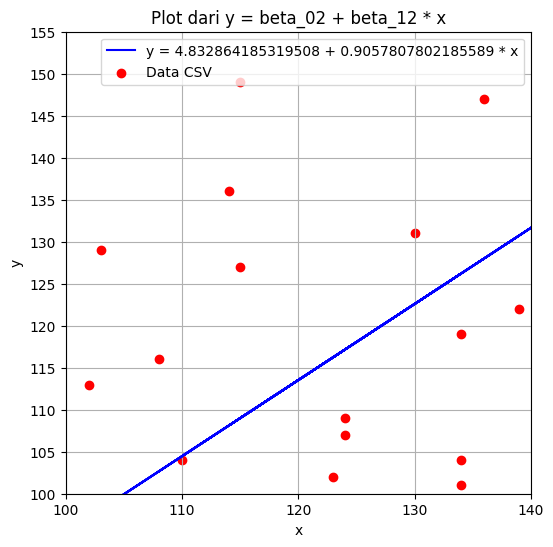

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Pastikan Anda mengimpor pandas jika menggunakan DataFrame

# Misalkan df1, beta_0, dan beta_1 sudah didefinisikan
# df1 = pd.read_csv('data.csv')  # Contoh cara membaca data
# beta_0 = 1000  # Contoh nilai beta_0
# beta_1 = 3000  # Contoh nilai beta_1

# Buat array x dari DataFrame
x1 = df1['x'] 

# Hitung nilai y
y2 = beta_0 +  beta_1* x1


# Plot
plt.figure(figsize=(6, 6))
plt.plot(x1, y2, label=f'y = {beta_0} + {beta_1} * x', color='blue')
plt.scatter(df1['x'], df1['y'], color='red', label='Data CSV')
plt.title('Plot dari y = beta_02 + beta_12 * x')
plt.xlabel('x')
plt.ylabel('y')

# Menetapkan limit sumbu
plt.xlim(100, 130)  # Sesuaikan sesuai kebutuhan
plt.ylim(min(y), max(y))  # Sesuaikan dengan rentang nilai y yang dihitung

# # Garis horizontal dan vertikal di sumbu
# plt.axhline(0, color='black', lw=0.5, ls='--')
# plt.axvline(0, color='black', lw=0.5, ls='--')

# Mengatur ticks
plt.xticks(np.arange(100, 150, 10)) 
plt.yticks(np.arange(100, max(y) + 10, 5))  # Menyesuaikan rentang y

plt.grid()
plt.legend()
plt.show()


In [136]:
# menghitung R kuadrat
k =  ((y2-f)**2)
l = ((df1['y']- f)**2)
JKR = k.sum()
JKT = l.sum()
RKR = JKT/1
JKS = JKT - JKR
dk_galat = df1.shape[0] - 2
dk_total = df1.shape[0] - 1
RKS = JKS/dk_galat
f_statistik = RKR/RKS

R_kuadrat = JKR/JKT
print("jumlah r kuadrat yaitu ",R_kuadrat)
print("nilai Jkr yaitu ",JKR)
print("nilai JKT yaitu  ",JKT)
print("nilai JKS yaitu ",JKS)
print("jumlah nilai RKR ",RKR)
print("dgree of freedom pada galat ",dk_galat)
print("print degre of freedom total ",dk_total)
print("jumlah nilai RKS ", RKS)
print("F_statisiknya yaitu ",f_statistik)


jumlah r kuadrat yaitu  0.7263675686124276
nilai Jkr yaitu  3562.7966056655273
nilai JKT yaitu   4904.950000000001
nilai JKS yaitu  1342.1533943344734
jumlah nilai RKR  4904.950000000001
dgree of freedom pada galat  18
print degre of freedom total  19
jumlah nilai RKS  74.56407746302631
F_statisiknya yaitu  65.7816762023535


### Kesimpulannya tidak ada perbedaan jauh antara metode matriks dan metode estimasi biasa pada anlisis sederhana ini